# Analysis of COVID-19 and Its Impact on Students

##### In this notebook, we have analyzed and performed operations on the COVID-19 Survey Student Responses.csv dataset from COVID-19 and Its Impact on Students data source.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("COVID-19 Survey Student Responses.csv")

display(data)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,R1191,Delhi-NCR,12,3.0,Good,Smartphone,4.0,1.0,8.0,1.0,Instagram,2,3,Decreased,NO,Dancing,YES,YES,Travelling
1178,R1192,Delhi-NCR,14,6.0,Average,Smartphone,4.0,1.0,9.0,1.0,Whatsapp,1,4,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives"
1179,R1193,Delhi-NCR,13,4.0,Average,Smartphone,0.0,0.5,8.0,3.0,Youtube,2,4,Decreased,NO,Online gaming,NO,YES,School/college
1180,R1194,Delhi-NCR,14,5.0,Excellent,Laptop/Desktop,3.5,1.0,8.0,0.5,Youtube,1,4,Remain Constant,NO,Reading books,YES,YES,School/college


In [3]:
online_experience_rating = data.groupby("Rating of Online Class experience").count()["ID"]

online_experience_rating

Rating of Online Class experience
Average      387
Excellent     98
Good         230
Poor          30
Very poor    413
Name: ID, dtype: int64

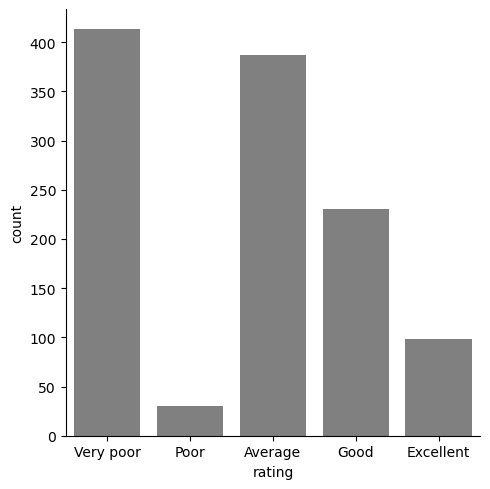

In [4]:
online_experience_rating_df = online_experience_rating.to_frame()

online_experience_rating_df["count"] = online_experience_rating_df["ID"]
online_experience_rating_df = online_experience_rating_df.drop(["ID"], axis = 1)

rating = pd.Series(["Very poor", "Poor", "Average", "Good", "Excellent"], name = "rating")
count = pd.Series([413, 30, 387, 230, 98], name = "count")

df = pd.concat([rating, count], axis = 1)

sns.catplot(x = "rating", y = "count", kind = "bar", color = "gray", data = df)
plt.show()

In [5]:
df

,rating,count
0,Very poor,413
1,Poor,30
2,Average,387
3,Good,230
4,Excellent,98


In [6]:
df2 = pd.concat([data["ID"], data["Rating of Online Class experience"], data["Medium for online class"], data["Time spent on self study"]], axis = 1)

df2

,ID,Rating of Online Class experience,Medium for online class,Time spent on self study
0,R1,Good,Laptop/Desktop,4.0
1,R2,Excellent,Smartphone,0.0
2,R3,Very poor,Laptop/Desktop,3.0
3,R4,Very poor,Smartphone,2.0
4,R5,Good,Laptop/Desktop,3.0
...,...,...,...,...
1177,R1191,Good,Smartphone,4.0
1178,R1192,Average,Smartphone,4.0
1179,R1193,Average,Smartphone,0.0
1180,R1194,Excellent,Laptop/Desktop,3.5


In [7]:
medium_rating = df2.groupby(["Rating of Online Class experience", "Medium for online class"]).count()["ID"]

medium_rating

Rating of Online Class experience  Medium for online class     
Average                            Any Gadget                        1
                                   Laptop/Desktop                  199
                                   Smartphone                      169
                                   Smartphone or Laptop/Desktop      1
                                   Tablet                            7
Excellent                          Laptop/Desktop                   43
                                   Smartphone                       46
                                   Smartphone or Laptop/Desktop      2
                                   Tablet                            5
Good                               Any Gadget                        3
                                   Laptop/Desktop                  110
                                   Smartphone                       95
                                   Smartphone or Laptop/Desktop      1
             

In [8]:
considering_age = pd.concat([data["ID"], data["Rating of Online Class experience"], data["Medium for online class"], data["Age of Subject"]], axis = 1)

considering_age

,ID,Rating of Online Class experience,Medium for online class,Age of Subject
0,R1,Good,Laptop/Desktop,21
1,R2,Excellent,Smartphone,21
2,R3,Very poor,Laptop/Desktop,20
3,R4,Very poor,Smartphone,20
4,R5,Good,Laptop/Desktop,21
...,...,...,...,...
1177,R1191,Good,Smartphone,12
1178,R1192,Average,Smartphone,14
1179,R1193,Average,Smartphone,13
1180,R1194,Excellent,Laptop/Desktop,14


In [9]:
# Let's look at just undergrad age students (17-23 yrs)

filter_age = (considering_age["Age of Subject"] >= 17) & (considering_age["Age of Subject"] <= 23)

final_age = considering_age[filter_age]

# and just laptops vs smartphones

filter_medium = (final_age["Medium for online class"] == "Laptop/Desktop") | (final_age["Medium for online class"] == "Smartphone")

final_medium = final_age[filter_medium]

final_medium



,ID,Rating of Online Class experience,Medium for online class,Age of Subject
0,R1,Good,Laptop/Desktop,21
1,R2,Excellent,Smartphone,21
2,R3,Very poor,Laptop/Desktop,20
3,R4,Very poor,Smartphone,20
4,R5,Good,Laptop/Desktop,21
...,...,...,...,...
1091,R1103,Very poor,Laptop/Desktop,17
1093,R1105,Very poor,Smartphone,20
1124,R1136,Average,Smartphone,18
1143,R1155,Very poor,Smartphone,17


In [10]:
medium_rating = final_medium.groupby(["Rating of Online Class experience", "Medium for online class"]).count()["ID"]

medium_rating

Rating of Online Class experience  Medium for online class
Average                            Laptop/Desktop             147
                                   Smartphone                 103
Excellent                          Laptop/Desktop              16
                                   Smartphone                  13
Good                               Laptop/Desktop              65
                                   Smartphone                  43
Poor                               Laptop/Desktop               9
                                   Smartphone                  15
Very poor                          Laptop/Desktop             163
                                   Smartphone                 175
Name: ID, dtype: int64

In [11]:
rating = pd.Series(["Very poor", "Very poor", "Poor", "Poor", "Average", "Average", "Good", "Good", "Excellent", "Excellent"], name = "rating")

medium = pd.Series(["Laptop/Desktop", "Smartphone", "Laptop/Desktop", "Smartphone", "Laptop/Desktop", "Smartphone", "Laptop/Desktop", "Smartphone", "Laptop/Desktop", "Smartphone",], name = "medium")

count = pd.Series([163, 175, 9, 15, 147, 103, 65, 43, 16, 13], name = "count")

df3 = pd.concat([rating, medium, count], axis = 1)

df3

,rating,medium,count
0,Very poor,Laptop/Desktop,163
1,Very poor,Smartphone,175
2,Poor,Laptop/Desktop,9
3,Poor,Smartphone,15
4,Average,Laptop/Desktop,147
5,Average,Smartphone,103
6,Good,Laptop/Desktop,65
7,Good,Smartphone,43
8,Excellent,Laptop/Desktop,16
9,Excellent,Smartphone,13


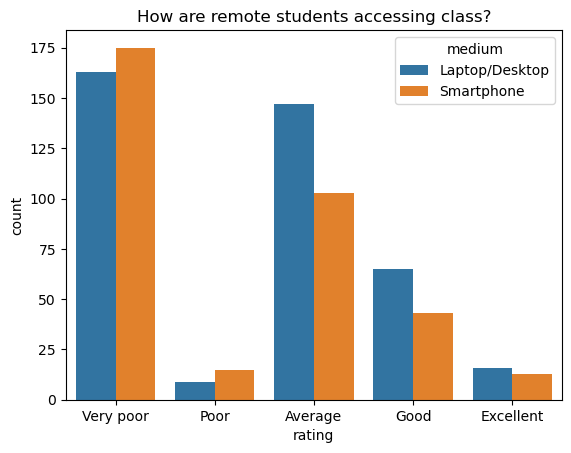

In [12]:
b = sns.barplot(data = df3, x = "rating", y = "count", hue = "medium").set(title = "How are remote students accessing class?")
plt.show()

In [13]:
online_experience_rating = final_age.groupby("Rating of Online Class experience").count()["ID"]

online_experience_rating

Rating of Online Class experience
Average      256
Excellent     29
Good         115
Poor          24
Very poor    355
Name: ID, dtype: int64

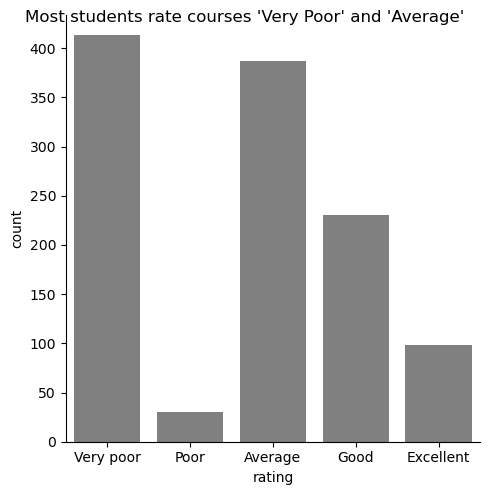

In [14]:
online_experience_rating_df = online_experience_rating.to_frame()

online_experience_rating_df["count"] = online_experience_rating_df["ID"]
online_experience_rating_df = online_experience_rating_df.drop(["ID"], axis = 1)

rating = pd.Series(["Very poor", "Poor", "Average", "Good", "Excellent"], name = "rating")
count = pd.Series([413, 30, 387, 230, 98], name = "count")

df = pd.concat([rating, count], axis = 1)

cat = sns.catplot(x = "rating", y = "count", kind = "bar", color = "gray", data = df)
cat.fig.suptitle("Most students rate courses 'Very Poor' and 'Average'")
plt.show()